In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('C:/Study/Study_Python2/Pandas 실습/subway_202101.csv', thousands=',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34


#### 무임승차 비율 확인

In [6]:
df['무임승차비율'] = df['무임승차']/(df['무임승차']+df['유임승차'])
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,무임승차비율
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34,0.148434
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34,0.535928
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34,0.110555
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34,0.123800
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34,0.374049
...,...,...,...,...,...,...,...,...,...,...
599,2021-01,우이신설선,705,북한산보국문,99921,97636,28310,29192,2021-02-03 09:49:34,0.220773
600,2021-01,우이신설선,706,정릉,67390,63786,30469,29394,2021-02-03 09:49:34,0.311356
601,2021-01,우이신설선,707,성신여대입구(돈암),50177,58328,19635,18769,2021-02-03 09:49:34,0.281255
602,2021-01,우이신설선,708,보문,22999,23078,10301,10532,2021-02-03 09:49:34,0.309339


#### 무임 승차 비율이 가장 높은 역의 승 하차 현황 그래프로 표현

In [7]:
df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8]

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

- 유임승차 비율 = (유임승차 / 전체 승하차 횟수)*100

In [10]:
station = df[df['무임승차비율'] == df['무임승차비율'].max()]
유임승차 = station['유임승차']
유임하차 = station['유임하차']
무임승차 = station['무임승차']
무임하차 = station['무임하차']
total = df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8].sum(axis=0)
print(total)

111275


In [9]:
import matplotlib.pyplot as plt

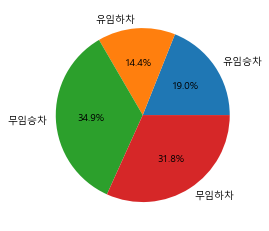

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.pie(
    [유임승차.sum() / total*100, 유임하차.sum() / total*100,
    무임승차.sum() / total*100, 무임하차.sum() / total*100],
    labels = ['유임승차','유임하차','무임승차','무임하차'],
    autopct = '%.1f%%')

plt.show()

#### 07~10시 가장 많은 사람이 타고 내리는 역

In [19]:
columns = pd.read_csv('C:/Study/Study_Python2/Pandas 실습/subway_2_202101.csv').columns
columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [21]:
df = pd.read_csv('C:/Study/Study_Python2/Pandas 실습/subway_2_202101.csv', thousands=',', skiprows=1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2021-01,우이신설선,705,북한산보국문,2,0,1565,487,5142,1641,...,2139,2,3,0,0,0,0,0,0,2021-02-03 09:49:40
600,2021-01,우이신설선,706,정릉,0,0,1455,367,3906,1399,...,1006,1,1,0,0,0,0,0,0,2021-02-03 09:49:40
601,2021-01,우이신설선,707,성신여대입구(돈암),1,0,611,349,755,862,...,523,0,2,0,0,0,0,0,0,2021-02-03 09:49:40
602,2021-01,우이신설선,708,보문,2,0,269,215,585,962,...,393,0,6,0,0,0,0,0,0,2021-02-03 09:49:40


In [22]:
df.columns = columns
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


- 역명 + 07~10시 데이터 확인

In [37]:
df2 = df.iloc[:, [3,10,11,12,13,14,15,16,17]]
df2.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013
2,시청,4971,47793,6119,131340,6335,62133,7012,23760
3,종각,4413,77560,6631,165202,7997,100421,10911,42055
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285


- 07~10시 이동인구 합계

In [38]:
df2['출근'] = df2.iloc[:, 1:].sum(axis=1)
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8804\4053456018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['출근'] = df2.iloc[:, 1:].sum(axis=1)


,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874,480211
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013,71251
2,시청,4971,47793,6119,131340,6335,62133,7012,23760,289463
3,종각,4413,77560,6631,165202,7997,100421,10911,42055,415190
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285,196659


- 이동인구 내림차순 정렬

In [49]:
df3 = df2.sort_values(by='출근', ascending=False)
df3.iloc[:5,[0,-1]]

,지하철역,출근
31,강남,906268
41,구로디지털단지,866087
39,신림,812726
508,가산디지털단지,766108
30,역삼,740480


#### 시간대별 승차인원 합계

In [40]:
mx = df.iloc[:, range(4,52,2)].max(axis=0).tolist()
print(mx)

[7312, 32431, 62867, 169189, 259505, 152632, 76710, 64159, 66910, 74938, 86107, 111104, 125759, 190350, 283331, 177478, 159575, 189419, 43747, 11496, 496, 3, 5, 0]


- x축 tick 표시용 '역명(시간)' 형식의 리스트 생성

In [50]:
mx_station = []
for i, e in enumerate(mx):
    if e:
        mx_station.append('%s(%s)'
        % (df[df.iloc[:,i*2+4]==e]['지하철역'].iloc[0], i+4))

In [51]:
mx_station

['구로(4)',
 '신림(5)',
 '신림(6)',
 '신림(7)',
 '신림(8)',
 '신림(9)',
 '신림(10)',
 '신림(11)',
 '신림(12)',
 '강남(13)',
 '강남(14)',
 '강남(15)',
 '강남(16)',
 '강남(17)',
 '가산디지털단지(18)',
 '강남(19)',
 '강남(20)',
 '강남(21)',
 '강남(22)',
 '강남(23)',
 '부평(24)',
 '병점(25)',
 '고속터미널(26)']

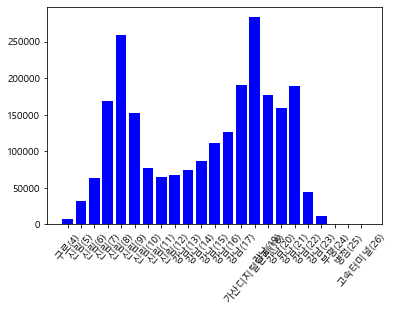

In [52]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(range(len(mx_station)), mx, color='blue')
plt.xticks(range(len(mx_station)), mx_station, rotation=50)
plt.show()

마지막 컬럼이 0이라서 제외

In [43]:
mx.pop()

0

In [46]:
len(mx),mx

(23,
 [7312,
  32431,
  62867,
  169189,
  259505,
  152632,
  76710,
  64159,
  66910,
  74938,
  86107,
  111104,
  125759,
  190350,
  283331,
  177478,
  159575,
  189419,
  43747,
  11496,
  496,
  3,
  5])